# Check to see if we're running in Colab (versus local server)

In [13]:
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

We're running Colab


In [14]:
import tensorflow as tf

print("Running TensorFlow version ",tf.__version__)

# Parse tensorflow version
import re

version_match = re.match("([0-9]+)\.([0-9]+)", tf.__version__)
tf_major, tf_minor = int(version_match.group(1)) , int(version_match.group(2))
print("Version {v:d}, minor {m:d}".format(v=tf_major, m=tf_minor) )

Running TensorFlow version  2.8.0
Version 2, minor 8


In [15]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

Using GPU


# Mount the Google Drive (if we're in Colab), switch current directory to a directory on the Google Drive
- we will (optionally) create the specified directory on the Google Drive if it doesn't exist

In [16]:
if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/gdrive'
  print("Colab: mounting Google drive on ", mount)

  drive.mount(mount)

  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/My Drive/Colab Notebooks/NYU/demo"
  
  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)
  
  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root
else:
    raise RuntimeError("This notebook should be run from Colab, not on the local machine")

Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/My Drive/Colab Notebooks/NYU/demo  exists.

Colab: Changing directory to  /content/gdrive/My Drive/Colab Notebooks/NYU/demo
/content/gdrive/My Drive/Colab Notebooks/NYU/demo


# Work with files on the Google Drive
- existing files
- upload files to Google Drive (as per normal)
- load files from external source

In [17]:
# Verify we're in the correct working directory
%pwd

'/content/gdrive/My Drive/Colab Notebooks/NYU/demo'

## Fill the working directory from our Git repo !

In [18]:
# Let's load the working directory from our Git repo !
repo = "ML_Fall_2021"
repo_url = "https://github.com/kenperry-public/{r}.git".format(r=repo)

import os
# Clone the repo unless it is already there
repo_root = os.path.join(drive_root, repo)

# Clone or refresh from the repo depending on whether we've cloned before
if not os.path.exists( repo_root ):
  print("Cloning from Git url: ", repo_url)
  ! git clone $repo_url
else:
  print("Refreshing from Git url: ", repo_url)
  %cd $repo_root
  ! git pull


print("\nChange working directory to repo root")
%cd $repo_root

Refreshing from Git url:  https://github.com/kenperry-public/ML_Fall_2021.git
/content/gdrive/My Drive/Colab Notebooks/NYU/demo/ML_Fall_2021
Already up to date.

Change working directory to repo root
/content/gdrive/My Drive/Colab Notebooks/NYU/demo/ML_Fall_2021


## Verify that imports (of modules on the Google Drive) work

In [19]:
# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import numpy as np
import neural_net_helper
%aimport neural_net_helper

nnh = neural_net_helper.NN_Helper()

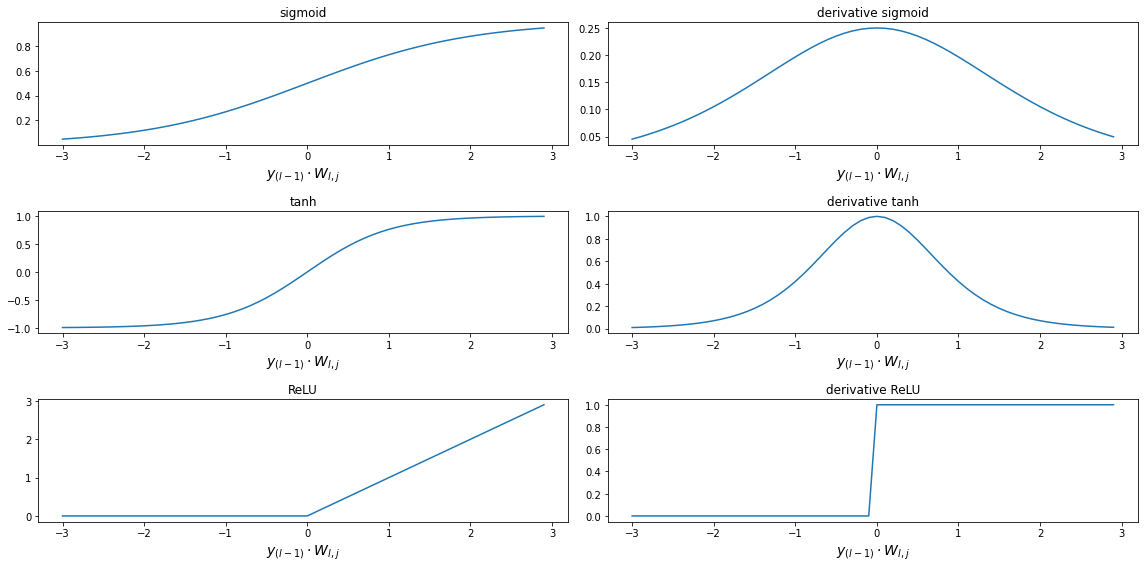

In [21]:

fig, _ = nnh.plot_activations( np.arange(-3,3, 0.1) )

In [22]:
print("Done")

Done
